In [1]:
import numpy as np
import pandas as pd
import random as rd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from scipy.stats import skew
from scipy.stats import anderson
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
dane = pd.read_excel('physical_activity_data.xlsx')
dane

,STREN,SELFR100,SS100,SSE100,OEVNORM
0,7.0,69.0,75.0,100.0,69.0
1,4.0,61.0,25.0,83.0,61.0
2,2.0,50.0,58.0,60.0,65.0
3,5.0,56.0,63.0,91.0,NaN
4,0.0,51.0,58.0,54.0,61.0
...,...,...,...,...,...
243,5.0,76.0,80.0,71.0,NaN
244,6.0,48.0,40.0,66.0,49.0
245,6.0,77.0,100.0,91.0,80.0
246,7.0,94.0,90.0,100.0,73.0


In [3]:
dane_df = pd.DataFrame(dane)
dane_df

,STREN,SELFR100,SS100,SSE100,OEVNORM
0,7.0,69.0,75.0,100.0,69.0
1,4.0,61.0,25.0,83.0,61.0
2,2.0,50.0,58.0,60.0,65.0
3,5.0,56.0,63.0,91.0,NaN
4,0.0,51.0,58.0,54.0,61.0
...,...,...,...,...,...
243,5.0,76.0,80.0,71.0,NaN
244,6.0,48.0,40.0,66.0,49.0
245,6.0,77.0,100.0,91.0,80.0
246,7.0,94.0,90.0,100.0,73.0


In [4]:
dane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STREN     236 non-null    float64
 1   SELFR100  232 non-null    float64
 2   SS100     243 non-null    float64
 3   SSE100    247 non-null    float64
 4   OEVNORM   190 non-null    float64
dtypes: float64(5)
memory usage: 9.8 KB


In [5]:
print(dane_df.isnull().sum())

STREN       12
SELFR100    16
SS100        5
SSE100       1
OEVNORM     58
dtype: int64


In [6]:
print(sum(dane_df.isnull().sum()))

92


In [7]:
dane.dropna(subset = ["STREN"], inplace = True)
print(dane)

     STREN  SELFR100  SS100  SSE100  OEVNORM
0      7.0      69.0   75.0   100.0     69.0
1      4.0      61.0   25.0    83.0     61.0
2      2.0      50.0   58.0    60.0     65.0
3      5.0      56.0   63.0    91.0      NaN
4      0.0      51.0   58.0    54.0     61.0
..     ...       ...    ...     ...      ...
243    5.0      76.0   80.0    71.0      NaN
244    6.0      48.0   40.0    66.0     49.0
245    6.0      77.0  100.0    91.0     80.0
246    7.0      94.0   90.0   100.0     73.0
247    3.0      57.0   68.0    86.0     62.0

[236 rows x 5 columns]


In [8]:
dane.dropna(subset = ["SELFR100"], inplace = True)
print(dane)

     STREN  SELFR100  SS100  SSE100  OEVNORM
0      7.0      69.0   75.0   100.0     69.0
1      4.0      61.0   25.0    83.0     61.0
2      2.0      50.0   58.0    60.0     65.0
3      5.0      56.0   63.0    91.0      NaN
4      0.0      51.0   58.0    54.0     61.0
..     ...       ...    ...     ...      ...
243    5.0      76.0   80.0    71.0      NaN
244    6.0      48.0   40.0    66.0     49.0
245    6.0      77.0  100.0    91.0     80.0
246    7.0      94.0   90.0   100.0     73.0
247    3.0      57.0   68.0    86.0     62.0

[221 rows x 5 columns]


In [9]:
dane.dropna(subset = ["SS100"], inplace = True)
print(dane)

     STREN  SELFR100  SS100  SSE100  OEVNORM
0      7.0      69.0   75.0   100.0     69.0
1      4.0      61.0   25.0    83.0     61.0
2      2.0      50.0   58.0    60.0     65.0
3      5.0      56.0   63.0    91.0      NaN
4      0.0      51.0   58.0    54.0     61.0
..     ...       ...    ...     ...      ...
243    5.0      76.0   80.0    71.0      NaN
244    6.0      48.0   40.0    66.0     49.0
245    6.0      77.0  100.0    91.0     80.0
246    7.0      94.0   90.0   100.0     73.0
247    3.0      57.0   68.0    86.0     62.0

[218 rows x 5 columns]


In [10]:
dane.dropna(subset = ["SSE100"], inplace = True)
print(dane)

     STREN  SELFR100  SS100  SSE100  OEVNORM
0      7.0      69.0   75.0   100.0     69.0
1      4.0      61.0   25.0    83.0     61.0
2      2.0      50.0   58.0    60.0     65.0
3      5.0      56.0   63.0    91.0      NaN
4      0.0      51.0   58.0    54.0     61.0
..     ...       ...    ...     ...      ...
243    5.0      76.0   80.0    71.0      NaN
244    6.0      48.0   40.0    66.0     49.0
245    6.0      77.0  100.0    91.0     80.0
246    7.0      94.0   90.0   100.0     73.0
247    3.0      57.0   68.0    86.0     62.0

[217 rows x 5 columns]


In [11]:
dane.dropna(subset = ["OEVNORM"], inplace = True)
print(dane)

     STREN  SELFR100  SS100  SSE100  OEVNORM
0      7.0      69.0   75.0   100.0     69.0
1      4.0      61.0   25.0    83.0     61.0
2      2.0      50.0   58.0    60.0     65.0
4      0.0      51.0   58.0    54.0     61.0
5      2.0      38.0   25.0    57.0     38.0
..     ...       ...    ...     ...      ...
242    2.0      61.0   33.0    34.0     65.0
244    6.0      48.0   40.0    66.0     49.0
245    6.0      77.0  100.0    91.0     80.0
246    7.0      94.0   90.0   100.0     73.0
247    3.0      57.0   68.0    86.0     62.0

[174 rows x 5 columns]


In [12]:
dane.describe()

,STREN,SELFR100,SS100,SSE100,OEVNORM
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,3.376437,55.137931,55.517241,68.735632,55.212644
std,2.189826,15.738596,20.563373,17.872354,19.775493
min,0.000000,18.000000,20.000000,20.000000,5.000000
25%,1.250000,45.250000,40.000000,57.000000,42.000000
50%,3.000000,55.000000,55.000000,71.000000,55.000000
75%,5.000000,66.000000,68.000000,80.000000,69.000000
max,7.000000,94.000000,100.000000,100.000000,97.000000


In [13]:
print(sum(dane['STREN']==0.5))

1


In [14]:
dane.drop([7], inplace=True)


In [15]:
print(sum(dane['STREN']==0.5))

0


In [16]:
dane.describe()

,STREN,SELFR100,SS100,SSE100,OEVNORM
count,173.000000,173.000000,173.00000,173.000000,173.000000
mean,3.393064,55.144509,55.50289,68.687861,55.213873
std,2.185140,15.784042,20.62219,17.913089,19.832890
min,0.000000,18.000000,20.00000,20.000000,5.000000
25%,2.000000,45.000000,40.00000,57.000000,42.000000
50%,3.000000,55.000000,55.00000,71.000000,55.000000
75%,5.000000,66.000000,68.00000,80.000000,69.000000
max,7.000000,94.000000,100.00000,100.000000,97.000000


In [17]:
print(sum(dane['STREN']==1))

22


In [18]:
dane['STREN']

0      7.0
1      4.0
2      2.0
4      0.0
5      2.0
      ... 
242    2.0
244    6.0
245    6.0
246    7.0
247    3.0
Name: STREN, Length: 173, dtype: float64

In [19]:
dane_rename_column = dane.rename(columns={'STREN': 'LICZBA DNI', 'SELFR100': 'OSOBISTY CEL', 'SS100': 'WSPARCIE SPOŁECZNE ', 'SSE100': 'BARIERY', 'OEVNORM': 'OCZEKIWANIA'})

In [20]:
corr_dane = dane_rename_column.corr().round(2)
corr_dane

,LICZBA DNI,OSOBISTY CEL,WSPARCIE SPOŁECZNE,BARIERY,OCZEKIWANIA
LICZBA DNI,1.00,0.45,0.27,0.36,0.48
OSOBISTY CEL,0.45,1.00,0.63,0.55,0.61
WSPARCIE SPOŁECZNE,0.27,0.63,1.00,0.47,0.40
BARIERY,0.36,0.55,0.47,1.00,0.53
OCZEKIWANIA,0.48,0.61,0.40,0.53,1.00


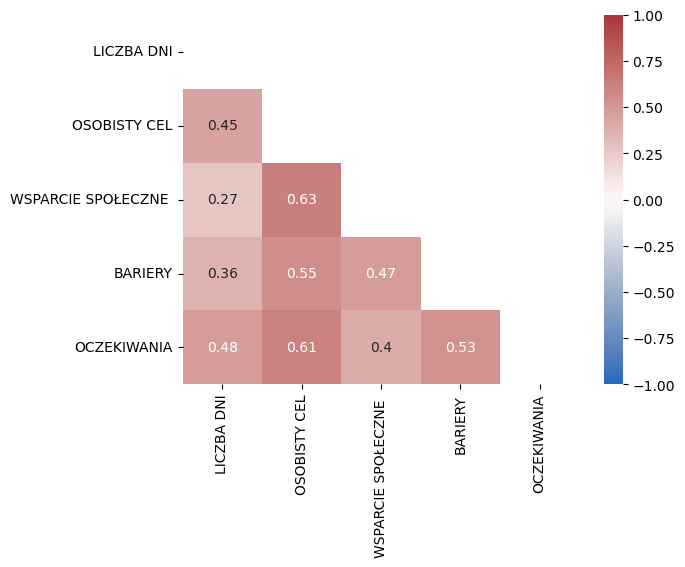

In [21]:
import seaborn as sns
matrix = dane_rename_column.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [22]:
x_selfr100 = np.array(dane['SELFR100'])
y_stren = np.array(dane['STREN'])

In [23]:
wspolczynnik_korelacji_SELFR100 = np.corrcoef(y_stren, x_selfr100) # współczynnik korelacji dla zmiennej niezależnej: SELFR100
wspolczynnik_korelacji_SELFR100 #test dla wsp kor

array([[1.        , 0.45280184],
       [0.45280184, 1.        ]])

In [24]:
stren = dane['STREN'] # zmienna zależna
selfr100 = dane['SELFR100']
ss100 = dane['SS100']
sse100 = dane['SSE100']
oevnorm = dane['OEVNORM']

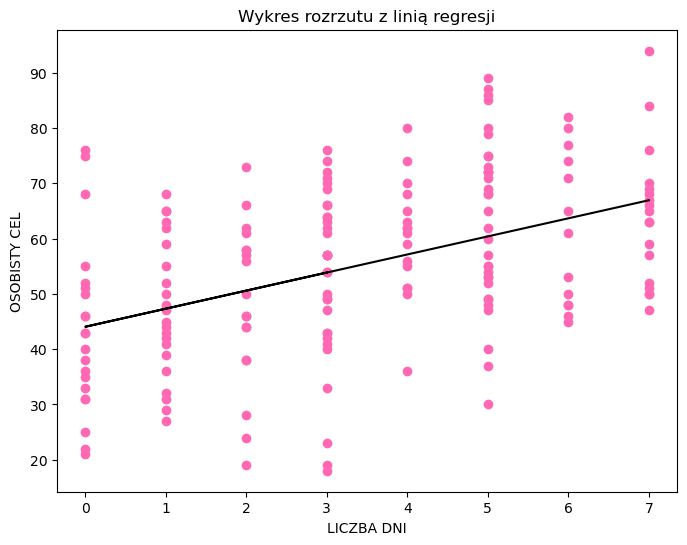

In [25]:
# linia regresji dla zmiennej zależnej STREN i zmiennej niezależnej: SELFR100
slope, intercept, r, p, std_err = stats.linregress(stren, selfr100)

def myfunc(stren):
  return slope * stren + intercept

mymodel = list(map(myfunc, stren))

plt.figure(figsize=(8, 6))
plt.scatter(stren, selfr100, color = 'hotpink')
plt.plot(stren, mymodel, color = 'black')
plt.title("Wykres rozrzutu z linią regresji")
plt.xlabel("LICZBA DNI")
plt.ylabel("OSOBISTY CEL")
plt.show() 

In [26]:
import statsmodels.api as sm
selfr100 = sm.add_constant(selfr100)
linear_regression = sm.OLS(stren, selfr100).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     44.10
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.98e-10
Time:                        02:06:07   Log-Likelihood:                -360.36
No. Observations:                 173   AIC:                             724.7
Df Residuals:                     171   BIC:                             731.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0637      0.541     -0.118      0.9

In [27]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.954


In [28]:
x_ss100 = np.array(dane['SS100'])

In [29]:
wspolczynnik_korelacji_SS100 = np.corrcoef(y_stren, x_ss100) # współczynnik korelacji dla zmiennej niezależnej: SS100
wspolczynnik_korelacji_SS100

array([[1.        , 0.27349739],
       [0.27349739, 1.        ]])

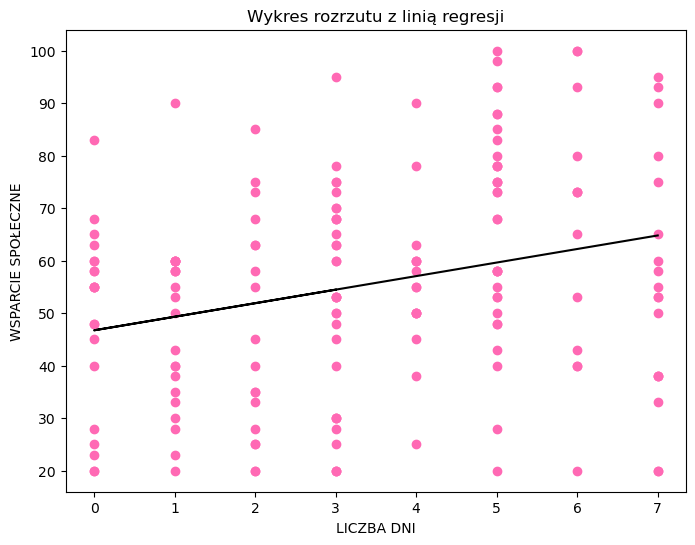

In [30]:
# linia regresji dla zmiennej zależnej STREN i zmiennej niezależnej: SS100
slope, intercept, r, p, std_err = stats.linregress(stren, ss100)

def myfunc(stren):
  return slope * stren + intercept

mymodel = list(map(myfunc, stren))

plt.figure(figsize=(8, 6))
plt.scatter(stren, ss100, color = 'hotpink')
plt.plot(stren, mymodel, color = 'black')
plt.title("Wykres rozrzutu z linią regresji")
plt.xlabel("LICZBA DNI")
plt.ylabel("WSPARCIE SPOŁECZNE")
plt.show() 

In [31]:
import statsmodels.api as sm
ss100 = sm.add_constant(ss100)
linear_regression = sm.OLS(stren, ss100).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     13.83
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           0.000272
Time:                        02:06:07   Log-Likelihood:                -373.48
No. Observations:                 173   AIC:                             751.0
Df Residuals:                     171   BIC:                             757.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7846      0.461      3.868      0.0

In [32]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

2.108


In [33]:
x_sse100 = np.array(dane['SSE100'])

In [34]:
wspolczynnik_korelacji_SSE100 = np.corrcoef(y_stren, x_sse100) # współczynnik korelacji dla zmiennej niezależnej: SSE100
wspolczynnik_korelacji_SSE100

array([[1.      , 0.357403],
       [0.357403, 1.      ]])

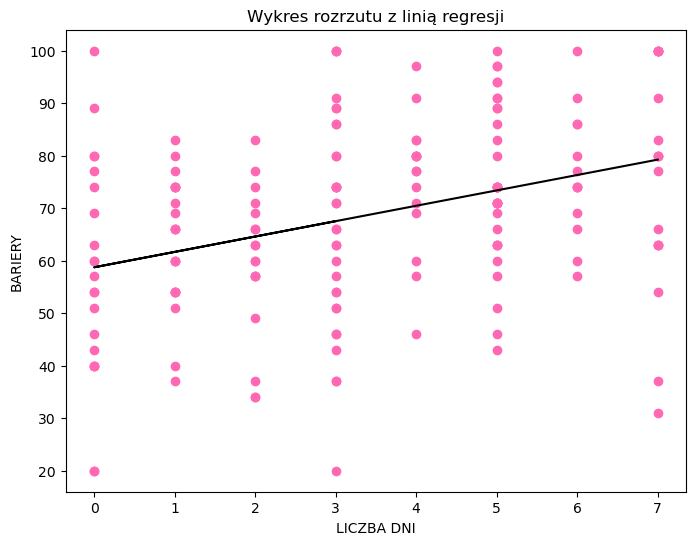

In [35]:
# linia regresji dla zmiennej zależnej STREN i zmiennej niezależnej: SSE100
slope, intercept, r, p, std_err = stats.linregress(stren, sse100)

def myfunc(stren):
  return slope * stren + intercept

mymodel = list(map(myfunc, stren))

plt.figure(figsize=(8, 6))
plt.scatter(stren, sse100, color = 'hotpink')
plt.plot(stren, mymodel, color = 'black')
plt.title("Wykres rozrzutu z linią regresji")
plt.xlabel("LICZBA DNI")
plt.ylabel("BARIERY")
plt.show() 

In [36]:
import statsmodels.api as sm
sse100 = sm.add_constant(sse100)
linear_regression = sm.OLS(stren, sse100).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     25.04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.38e-06
Time:                        02:06:07   Log-Likelihood:                -368.38
No. Observations:                 173   AIC:                             740.8
Df Residuals:                     171   BIC:                             747.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3984      0.618      0.644      0.5

In [37]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

2.047


In [38]:
x_oevnorm = np.array(dane['OEVNORM'])

In [39]:
wspolczynnik_korelacji_oevnorm = np.corrcoef(y_stren, x_oevnorm) # współczynnik korelacji dla zmiennej niezależnej: OEVNORM
wspolczynnik_korelacji_oevnorm

array([[1.        , 0.48342115],
       [0.48342115, 1.        ]])

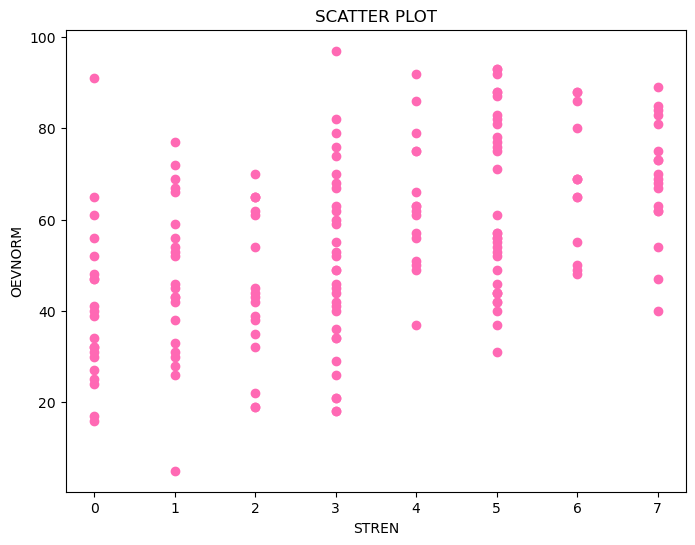

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(stren, oevnorm, color = 'hotpink')
plt.title("SCATTER PLOT")
plt.xlabel("STREN")
plt.ylabel("OEVNORM")
plt.show()

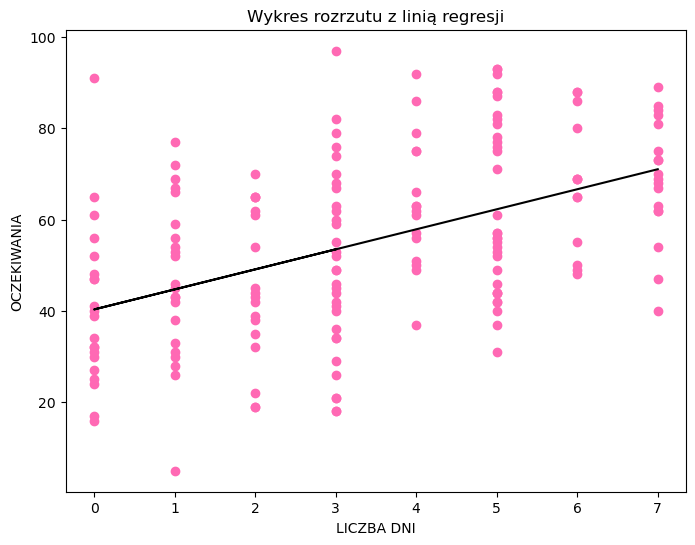

In [41]:
# linia regresji dla zmiennej zależnej STREN i zmiennej niezależnej: oevnorm
slope, intercept, r, p, std_err = stats.linregress(stren, oevnorm)

def myfunc(stren):
  return slope * stren + intercept

mymodel = list(map(myfunc, stren))

plt.figure(figsize=(8, 6))
plt.scatter(stren, oevnorm, color = 'hotpink')
plt.plot(stren, mymodel, color = 'black')
plt.title("Wykres rozrzutu z linią regresji")
plt.xlabel("LICZBA DNI")
plt.ylabel("OCZEKIWANIA")
plt.show() 

In [42]:
import statsmodels.api as sm
oevnorm = sm.add_constant(oevnorm)
linear_regression = sm.OLS(stren, oevnorm).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     52.15
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.62e-11
Time:                        02:06:08   Log-Likelihood:                -357.18
No. Observations:                 173   AIC:                             718.4
Df Residuals:                     171   BIC:                             724.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4523      0.433      1.046      0.2

In [43]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.918


In [44]:
dane.corr()

,STREN,SELFR100,SS100,SSE100,OEVNORM
STREN,1.000000,0.452802,0.273497,0.357403,0.483421
SELFR100,0.452802,1.000000,0.629876,0.546988,0.610319
SS100,0.273497,0.629876,1.000000,0.473136,0.404810
SSE100,0.357403,0.546988,0.473136,1.000000,0.528761
OEVNORM,0.483421,0.610319,0.404810,0.528761,1.000000


In [45]:
# żadna ze zmiennych niezależnych nie jest ze sobą silnie skorelowana, nie wyrzucam jednej z dwóch z modelu

In [46]:
stren = dane['STREN'] # zmienna zależna
selfr100 = dane['SELFR100']
ss100 = dane['SS100']
sse100 = dane['SSE100']
oevnorm = dane['OEVNORM']

In [47]:
for col in dane.columns:
    print(col)

STREN
SELFR100
SS100
SSE100
OEVNORM


In [48]:
x = dane[['SELFR100',
  'SS100',
  'SSE100',
  'OEVNORM']]
y = dane['STREN']

In [49]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [50]:
print(regr.coef_)

[ 0.03480629 -0.00495907  0.00974101  0.03379123]


In [51]:
x = sm.add_constant(x)

In [52]:
ks = sm.OLS(y, x)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  STREN   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     16.16
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.24e-11
Time:                        02:06:08   Log-Likelihood:                -352.05
No. Observations:                 173   AIC:                             714.1
Df Residuals:                     168   BIC:                             729.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7859      0.617     -1.274      0.204      -2.004       0.432
SELFR100       0.0348      0.014      2.529      0.012       0.008       0.062
SS100         -0.0050      0.009     -0.543      0.588      -0.023       0.013
SSE100         0.0097      0.010      0.955      0.341      -0.010       0.030
OEVNORM        0.0338      0.010      3.541      0.001       0.015       0.053
==============================================================================
Omnibus:                        4.135   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                2.525
Skew:                          -0.041   Prob(JB):                        0.283
Kurtosis:                       2.414   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

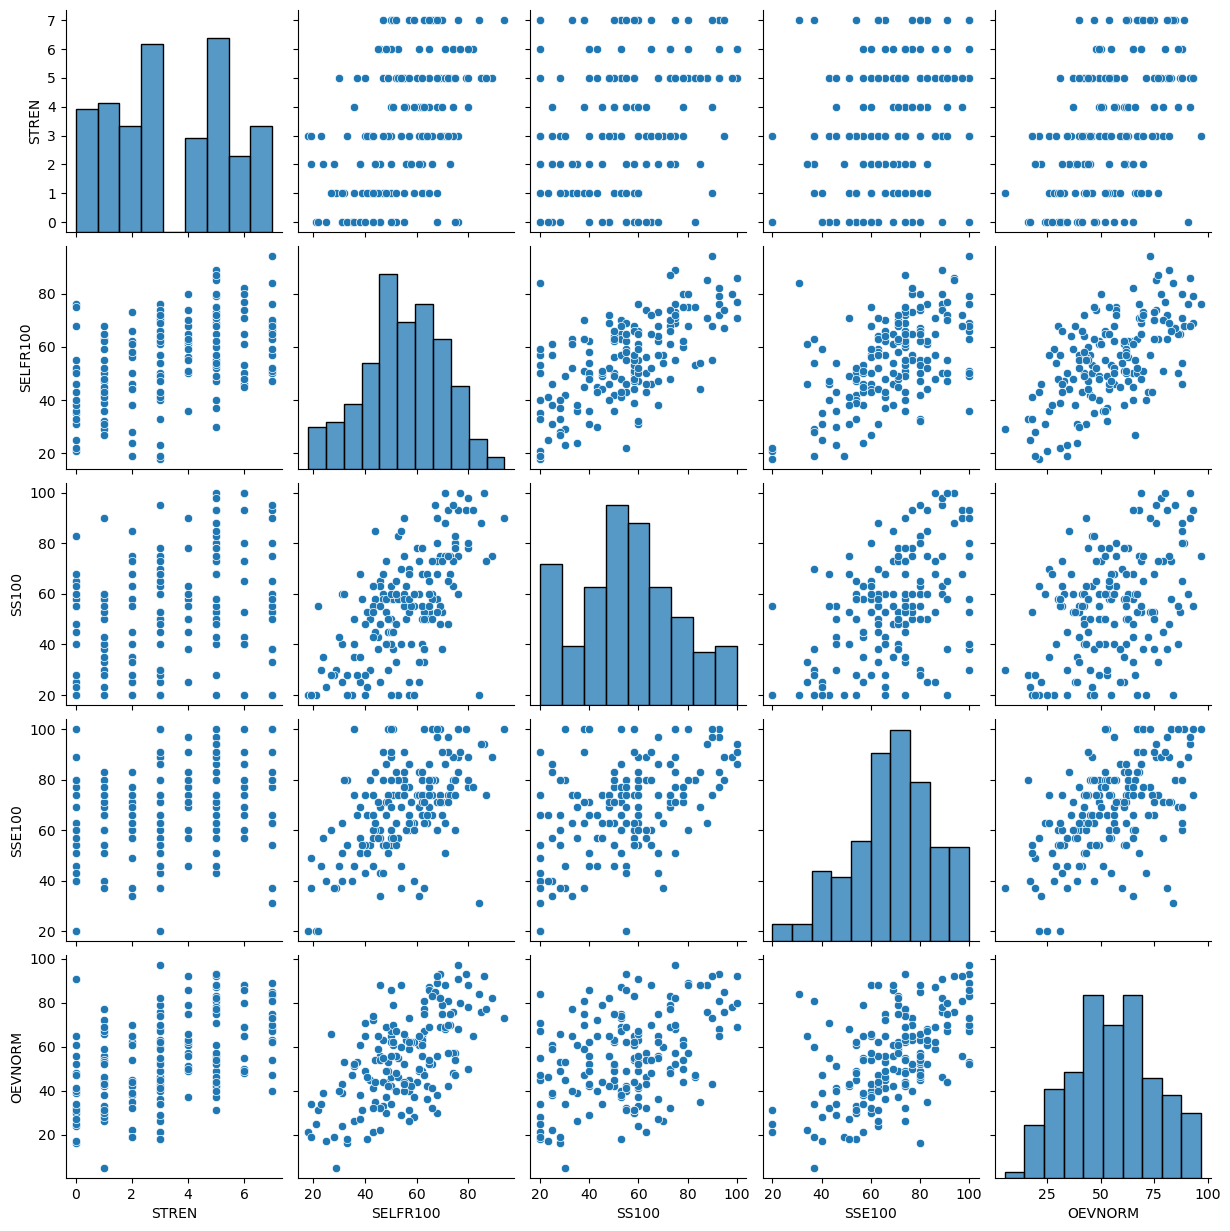

In [53]:
import seaborn as sns
sns.pairplot(dane)

In [54]:
srednia = st.mean(dane['STREN'])
srednia_round = round(srednia, 1)
mediana = st.median(dane['STREN']) # wartość środkowa
moda = st.mode(dane['STREN']) # moda=dominanta, wartość najczęstsza
skosnosc = skew(dane['STREN'])
# moda > średnia > mediana
print("STREN")
print("Średnia:",srednia_round, "\nMediana:" ,mediana, "\nModa:", moda)
print("Skośność:", skosnosc) # lekko prawoskośny
print("Minimum:", min(dane['STREN']))
print("Maksimum:", max(dane['STREN']))

STREN
Średnia: 3.4 
Mediana: 3.0 
Moda: 5.0
Skośność: 0.024062884573594977
Minimum: 0.0
Maksimum: 7.0


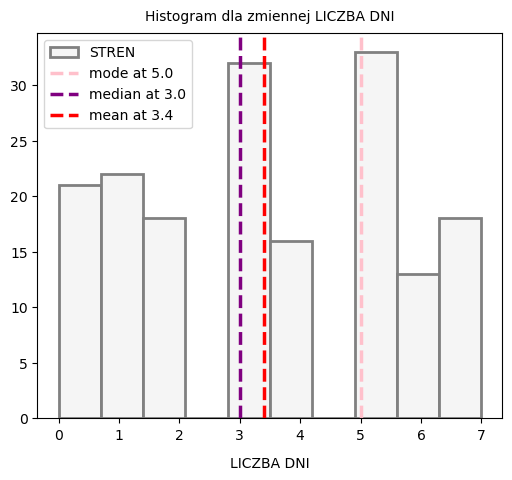

In [55]:
dane['STREN'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("LICZBA DNI", labelpad=10)
plt.ylabel("")
plt.title("Histogram dla zmiennej LICZBA DNI", y=1.012, fontsize=10)
measurements = [moda, mediana, srednia_round]
names = ["mode", "median", "mean"]
colors = ['pink', 'purple', 'red']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

In [56]:
srednia = st.mean(dane['SELFR100'])
srednia_round = round(srednia, 1)
mediana = st.median(dane['SELFR100'])
moda = st.mode(dane['SELFR100'])
skosnosc = skew(dane['SELFR100'])
# średnia > mediana > moda
print("SELFR100")
print("Średnia:",srednia_round, "\nMediana:" ,mediana, "\nModa:", moda)
print("Skośność:", skosnosc) # brak skośności
print("Minimum:", min(dane['SELFR100']))
print("Maksimum:", max(dane['SELFR100']))

SELFR100
Średnia: 55.1 
Mediana: 55.0 
Moda: 50.0
Skośność: -0.1524186289673021
Minimum: 18.0
Maksimum: 94.0


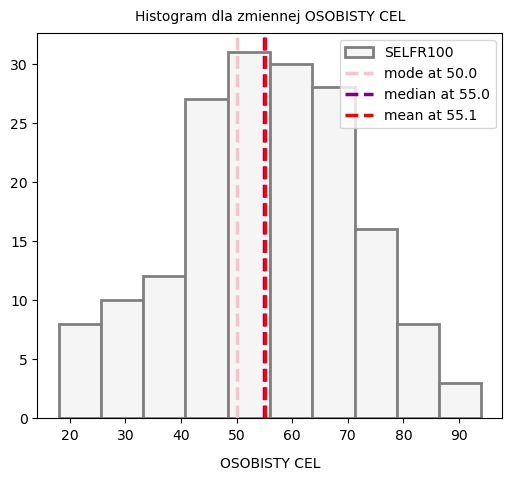

In [57]:
dane['SELFR100'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("OSOBISTY CEL", labelpad=10)
plt.ylabel("")
plt.title("Histogram dla zmiennej OSOBISTY CEL", y=1.012, fontsize=10)
measurements = [moda, mediana, srednia_round]
names = ["mode", "median", "mean"]
colors = ['pink', 'purple', 'red']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

In [58]:
srednia = st.mean(dane['SS100'])
srednia_round = round(srednia, 1)
mediana = st.median(dane['SS100'])
moda = st.mode(dane['SS100'])
skosnosc = skew(dane['SS100'])
# moda > średnia > mediana
print("SS100")
print("Średnia:",srednia_round, "\nMediana:" ,mediana, "\nModa:", moda)
print("Skośność:", skosnosc) # brak skośności
print("Minimum:", min(dane['SS100']))
print("Maksimum:", max(dane['SS100']))

SS100
Średnia: 55.5 
Mediana: 55.0 
Moda: 60.0
Skośność: 0.08544426581837947
Minimum: 20.0
Maksimum: 100.0


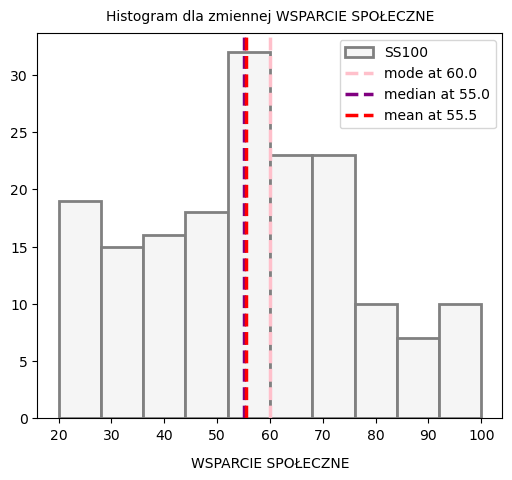

In [59]:
dane['SS100'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("WSPARCIE SPOŁECZNE", labelpad=10)
plt.ylabel("")
plt.title("Histogram dla zmiennej WSPARCIE SPOŁECZNE", y=1.012, fontsize=10)
measurements = [moda, mediana, srednia_round]
names = ["mode", "median", "mean"]
colors = ['pink', 'purple', 'red']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

In [60]:
srednia = st.mean(dane['SSE100'])
srednia_round = round(srednia, 1)
mediana = st.median(dane['SSE100'])
moda = st.mode(dane['SSE100'])
skosnosc = skew(dane['SSE100'])
# moda > mediana > średnia
print("SSE100")
print("Średnia:",srednia_round, "\nMediana:" ,mediana, "\nModa:", moda)
print("Skośność:", skosnosc) # lewoskośny
print("Minimum:", min(dane['SSE100']))
print("Maksimum:", max(dane['SSE100']))

SSE100
Średnia: 68.7 
Mediana: 71.0 
Moda: 74.0
Skośność: -0.3188765248412837
Minimum: 20.0
Maksimum: 100.0


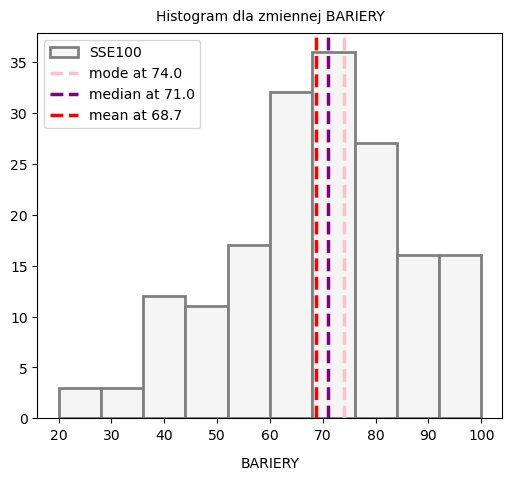

In [61]:
dane['SSE100'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("BARIERY", labelpad=10)
plt.ylabel("")
plt.title("Histogram dla zmiennej BARIERY", y=1.012, fontsize=10)
measurements = [moda, mediana, srednia_round]
names = ["mode", "median", "mean"]
colors = ['pink', 'purple', 'red']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

In [62]:
print(st.mean(dane['OEVNORM']))
print(st.median(dane['OEVNORM']))
print(st.mode(dane['OEVNORM']))

55.213872832369944
55.0
65.0


In [63]:
srednia = st.mean(dane['OEVNORM'])
srednia_round = round(srednia, 1)
mediana = st.median(dane['OEVNORM'])
moda = st.mode(dane['OEVNORM'])
skosnosc = skew(dane['OEVNORM'])
# moda > średnia > mediana
print("OEVNORM")
print("Średnia:",srednia_round, "\nMediana:" ,mediana, "\nModa:", moda)
print("Skośność:", skosnosc) # brak skośności
print("Minimum:", min(dane['OEVNORM']))
print("Maksimum:", max(dane['OEVNORM']))

OEVNORM
Średnia: 55.2 
Mediana: 55.0 
Moda: 65.0
Skośność: -0.015471453721414292
Minimum: 5.0
Maksimum: 97.0


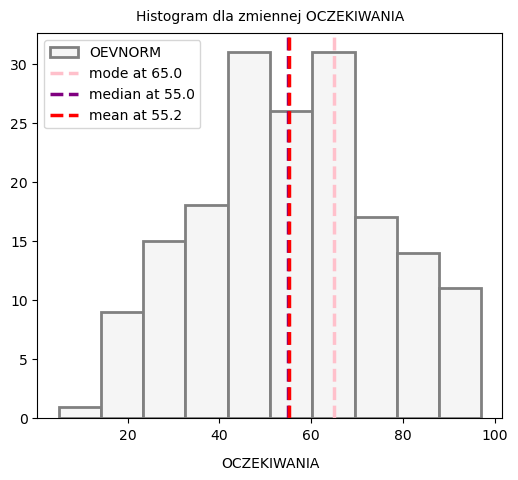

In [64]:
dane['OEVNORM'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("OCZEKIWANIA", labelpad=10)
plt.ylabel("")
plt.title("Histogram dla zmiennej OCZEKIWANIA", y=1.012, fontsize=10)
measurements = [moda, mediana, srednia_round]
names = ["mode", "median", "mean"]
colors = ['pink', 'purple', 'red']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

In [65]:
dane.shape

(173, 5)

In [66]:
x = dane.drop(['STREN'], axis=1)
y = dane['STREN']

In [67]:
x.shape, y.shape

((173, 4), (173,))

In [68]:
# testy shapiro-wilka
print(stats.shapiro(stren))
print(stats.shapiro(selfr100))
print(stats.shapiro(ss100))
print(stats.shapiro(sse100))
print(stats.shapiro(oevnorm))

ShapiroResult(statistic=0.9346601963043213, pvalue=4.479165340853797e-07)
ShapiroResult(statistic=0.9923624992370605, pvalue=0.49569714069366455)
ShapiroResult(statistic=0.9745175838470459, pvalue=0.002866318915039301)
ShapiroResult(statistic=0.9787494540214539, pvalue=0.009439161978662014)
ShapiroResult(statistic=0.9880679845809937, pvalue=0.15156123042106628)


In [69]:
# testy t dla zmiennych, domyślnie: test dwustronny
import scipy.stats

print(scipy.stats.ttest_ind(stren, selfr100))
print(scipy.stats.ttest_ind(stren, ss100))
print(scipy.stats.ttest_ind(stren, sse100))
print(scipy.stats.ttest_ind(stren, oevnorm))

# hipoteza zerowa: nie istnieje liniowa zależność pomiędzy zmiennymi
# hipoteza alternatywna: istnieje liniowa zależność pomiędzy zmiennymi

# w każdym przypadku p<alfa, odrzucamy zerową, przyjmujemy alternatywną

Ttest_indResult(statistic=-42.71741257279061, pvalue=1.3479983810964052e-139)
Ttest_indResult(statistic=-33.050911227483816, pvalue=8.531422599757598e-109)
Ttest_indResult(statistic=-47.590876349015815, pvalue=2.096408051824315e-153)
Ttest_indResult(statistic=-34.16025765263458, pvalue=1.4042258872267843e-112)


In [70]:
# budowa modeli z dwiema zmiennymi objaśniającymi (4 po 2 -> 6), metoda najlepszych podzbiorów

In [71]:
x21 = dane[['SELFR100','SS100']]
x22 = dane[['SELFR100','SSE100']]
x23 = dane[['SELFR100','OEVNORM']]
x24 = dane[['SS100','SSE100']]
x25 = dane[['SS100','OEVNORM']]
x26 = dane[['SSE100','OEVNORM']]

In [72]:
x21 = sm.add_constant(x21)
linear_regression = sm.OLS(stren, x21).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     21.95
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.31e-09
Time:                        02:06:13   Log-Likelihood:                -360.33
No. Observations:                 173   AIC:                             726.7
Df Residuals:                     170   BIC:                             736.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0429      0.551     -0.078      0.9

In [73]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.954


In [74]:
x22 = sm.add_constant(x22)
linear_regression = sm.OLS(stren, x22).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     24.28
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           5.29e-10
Time:                        02:06:13   Log-Likelihood:                -358.47
No. Observations:                 173   AIC:                             722.9
Df Residuals:                     170   BIC:                             732.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7218      0.635     -1.136      0.2

In [75]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.933


# NAJLEPSZY MODEL:

In [76]:
x23 = sm.add_constant(x23)
linear_regression = sm.OLS(stren, x23).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     31.98
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.63e-12
Time:                        02:06:13   Log-Likelihood:                -352.58
No. Observations:                 173   AIC:                             711.2
Df Residuals:                     170   BIC:                             720.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5336      0.532     -1.003      0.3

In [77]:
A = np.identity(len(linear_regression.params))
A = A[1:,:]
print(linear_regression.f_test(A))

<F test: F=31.976485144581417, p=1.63016073229381e-12, df_denom=170, df_num=2>


In [78]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.868


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


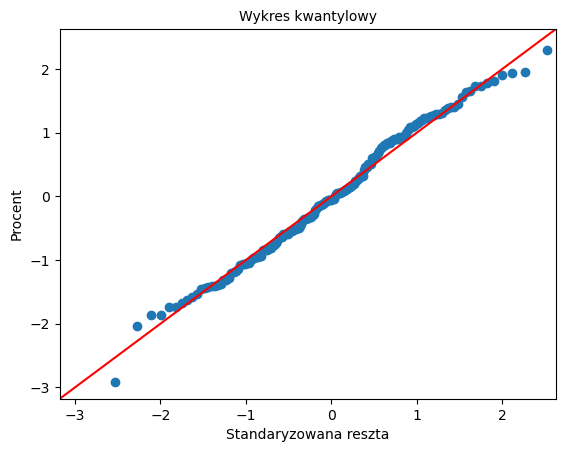

In [79]:
# wykres kwantylowy
standardized_residuals = linear_regression.resid.values
#print(standardized_residuals)
sm.qqplot(linear_regression.resid, fit=True, color = 'red', line='45')
plt.title("Wykres kwantylowy", fontsize=10)
plt.xlabel("Standaryzowana reszta", fontsize=10)
plt.ylabel("Procent", fontsize=10)
plt.show()

In [80]:
anderson(linear_regression.resid)

AndersonResult(statistic=0.6149302027602062, critical_values=array([0.563, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

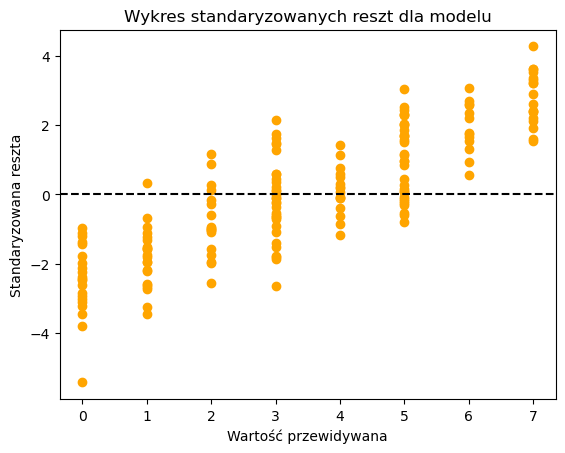

In [81]:
result = linear_regression.outlier_test()
x = dane['STREN']
y = result['student_resid']
plt.scatter(x, standardized_residuals, color = 'orange')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title("Wykres standaryzowanych reszt dla modelu")
plt.xlabel('Wartość przewidywana')
plt.ylabel('Standaryzowana reszta')
plt.show() # robocze

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

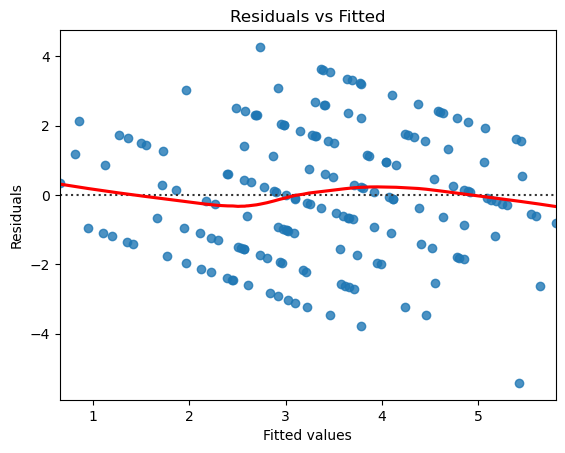

In [82]:
model_fitted_y = linear_regression.fittedvalues
plot = plt.figure()
plot = sns.residplot(model_fitted_y, dane['STREN'], data=dane,
                          lowess=True,
                          line_kws={'color': 'red'})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

In [83]:
stren = dane['STREN'] # zmienna zależna
selfr100 = dane['SELFR100']
ss100 = dane['SS100']
sse100 = dane['SSE100']
oevnorm = dane['OEVNORM']
stren

0      7.0
1      4.0
2      2.0
4      0.0
5      2.0
      ... 
242    2.0
244    6.0
245    6.0
246    7.0
247    3.0
Name: STREN, Length: 173, dtype: float64

In [84]:
# dataaa.to_excel('nowesample_data.xlsx')

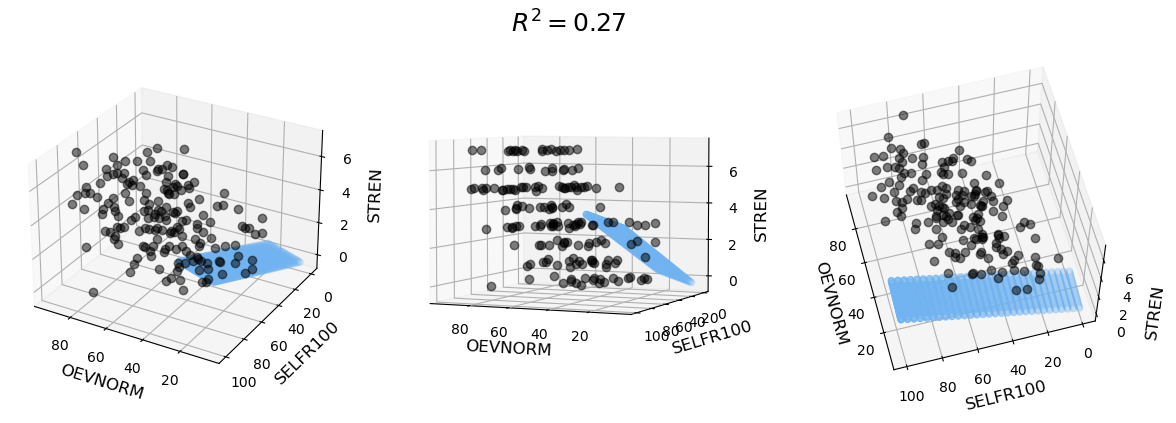

In [85]:
X = dane[['SELFR100', 'OEVNORM']].values
Y = dane['STREN']

x = dane['SELFR100']
y = dane['OEVNORM']
z = dane['STREN']

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('OEVNORM', fontsize=12)
    ax.set_ylabel('SELFR100', fontsize=12)
    ax.set_zlabel('STREN', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=18)

fig.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


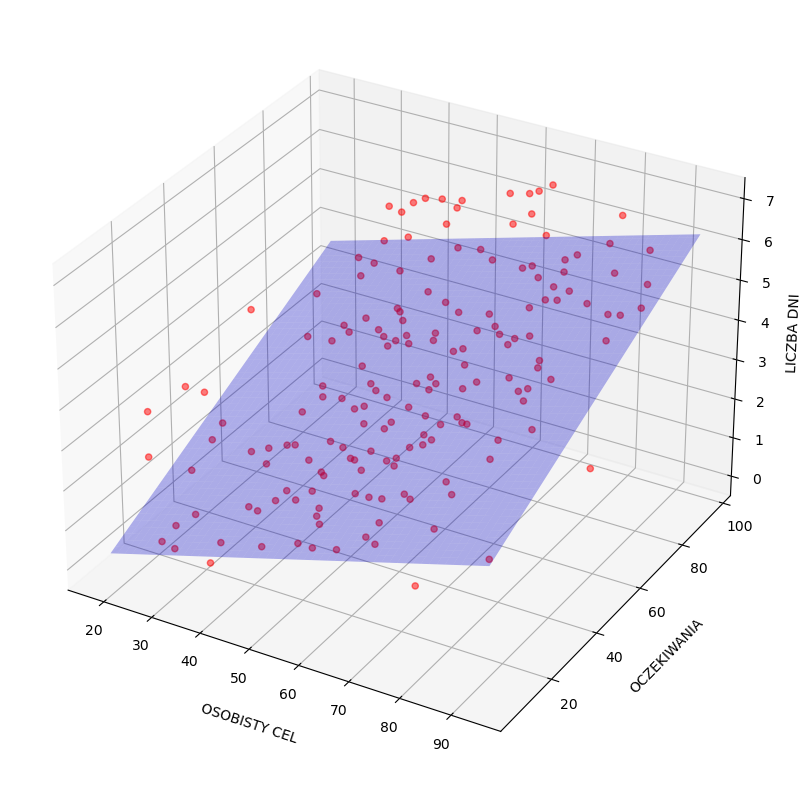

In [86]:
df2=pd.DataFrame(dane,columns=['SELFR100','OEVNORM'])
df2['STREN']=pd.Series(Y)

Regressor = LinearRegression()
Regressor.fit(X,Y)
x_surf, y_surf = np.meshgrid(np.linspace(df2.SELFR100.min(), df2.SELFR100.max(), 100),np.linspace(df2.OEVNORM.min(), df2.OEVNORM.max(), 100))
onlyX = pd.DataFrame({'SELFR100': x_surf.ravel(), 'OEVNORM': y_surf.ravel()})
fittedY=Regressor.predict(onlyX)
fittedY=np.array(fittedY)
fittedY

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['SELFR100'],df2['OEVNORM'],df2['STREN'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('OSOBISTY CEL', labelpad=12)
ax.set_ylabel('OCZEKIWANIA', labelpad=10)
ax.set_zlabel('LICZBA DNI')
plt.show()

In [87]:
x24 = sm.add_constant(x24)
linear_regression = sm.OLS(stren, x24).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     14.04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.27e-06
Time:                        02:06:15   Log-Likelihood:                -366.98
No. Observations:                 173   AIC:                             740.0
Df Residuals:                     170   BIC:                             749.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.634      0.222      0.8

In [88]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

2.03


In [89]:
x25 = sm.add_constant(x25)
linear_regression = sm.OLS(stren, x25).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     26.98
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           6.66e-11
Time:                        02:06:15   Log-Likelihood:                -356.36
No. Observations:                 173   AIC:                             718.7
Df Residuals:                     170   BIC:                             728.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1342      0.499      0.269      0.7

In [90]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.909


In [91]:
x26 = sm.add_constant(x26)
linear_regression = sm.OLS(stren, x26).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     28.04
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.98e-11
Time:                        02:06:15   Log-Likelihood:                -355.54
No. Observations:                 173   AIC:                             717.1
Df Residuals:                     170   BIC:                             726.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2771      0.590     -0.470      0.6

In [92]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.9


In [93]:
# budowa modeli z trzema zmiennymi objaśniającymi (4 po 3 -> 4)
x31 = dane[['SELFR100','SS100','OEVNORM']]
x32 = dane[['SELFR100','SSE100','OEVNORM']]
x33 = dane[['SSE100','OEVNORM','SS100']]
x34 = dane[['SELFR100','SSE100','SS100']]

In [94]:
x31 = sm.add_constant(x31)
linear_regression = sm.OLS(stren, x31).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     21.25
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           9.91e-12
Time:                        02:06:16   Log-Likelihood:                -352.52
No. Observations:                 173   AIC:                             713.0
Df Residuals:                     169   BIC:                             725.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5022      0.541     -0.929      0.3

In [95]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.867


In [96]:
x32 = sm.add_constant(x32)
linear_regression = sm.OLS(stren, x32).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     21.54
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           7.31e-12
Time:                        02:06:16   Log-Likelihood:                -352.20
No. Observations:                 173   AIC:                             712.4
Df Residuals:                     169   BIC:                             725.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8003      0.615     -1.301      0.1

In [97]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.864


In [98]:
x33 = sm.add_constant(x33)
linear_regression = sm.OLS(stren, x33).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     18.81
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.41e-10
Time:                        02:06:16   Log-Likelihood:                -355.28
No. Observations:                 173   AIC:                             718.6
Df Residuals:                     169   BIC:                             731.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3638      0.603     -0.603      0.5

In [99]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.897


In [100]:
x34 = sm.add_constant(x34)
linear_regression = sm.OLS(stren, x34).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     16.26
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.49e-09
Time:                        02:06:16   Log-Likelihood:                -358.27
No. Observations:                 173   AIC:                             724.5
Df Residuals:                     169   BIC:                             737.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7053      0.637     -1.107      0.2

In [101]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.931


In [102]:
# z czterema
x = dane.drop(['STREN'], axis=1)

In [103]:
x = sm.add_constant(x)
linear_regression = sm.OLS(stren, x).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  STREN   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     16.16
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.24e-11
Time:                        02:06:16   Log-Likelihood:                -352.05
No. Observations:                 173   AIC:                             714.1
Df Residuals:                     168   BIC:                             729.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7859      0.617     -1.274      0.2

In [104]:
A = np.identity(len(linear_regression.params))
A = A[1:,:]
print(linear_regression.f_test(A))

<F test: F=16.159410282899472, p=3.244636547858656e-11, df_denom=168, df_num=4>


In [105]:
e = linear_regression.resid.values
standardowy_bl_oszacowania = st.stdev(e) * sqrt(len(e)-1) * sqrt(1/(len(e)-2))
standardowy_blad_oszacowania = round(standardowy_bl_oszacowania, 3)
print(standardowy_blad_oszacowania)

1.862


In [106]:
wspolczynnik_korelacji_sse100_selfr100 = np.corrcoef(selfr100, sse100) # współczynnik korelacji dla zmiennych selfr100 i sse100
wspolczynnik_korelacji_sse100_selfr100 # słaba korelacja

array([[1.        , 0.54698776],
       [0.54698776, 1.        ]])

In [107]:
X = dane[['SELFR100',
  'SS100',
  'SSE100',
  'OEVNORM']]
y = dane['STREN']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

x = pd.DataFrame({'Zmienna':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
x.round(2)

,Zmienna,VIF
0,SELFR100,2.30
1,SS100,1.73
2,SSE100,1.62
3,OEVNORM,1.75


In [108]:
# VIF nie występuje w poziomie powyżej 5